[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/tyson-swetnam/agic-2022/blob/main/docs/notebooks/zarr.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://tyson-swetnam.github.io/agic-2022/notebooks/zarr/)

# Zarr example Jupyter Notebook

The following Notebook requires the installation of:
 
`aiohttp` 
`dask`
`matplotlib`
`python`
`requests`
`xarray`
`zarr`

It has been tested using the [Jupyter Project Docker Stack](https://jupyter-docker-stacks.readthedocs.io/en/latest/) image for `jupyter/datascience`

In [4]:
!pip install aiohttp dask matplotlib requests xarray zarr

In [ ]:
# to run this cell uncomment the line below by removing the # 
#!mamba install -y -c conda-forge aiohttp dask matplotlib python=3.9.12 requests xarray zarr

# Links to PANGEO

| Project Website Links | Notes |
|-----------------------|-------|
| [PANGEO](https://pangeo.io/) | |
| [PANGEO GitHub](https://github.com/pangeo-data/) | |
| [PANGEO Forge](https://pangeo-forge.org/) | |
| [Ryan Abernathey's @SciPy2022 YouTube Recording](https://youtu.be/sY20UpYCAEE?t=865) | (video embedded below) |



In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('sY20UpYCAEE?t=853')

## Import pre-processed GPCP data via PANGEO Forge

The following cell will pull the pre-processed [NOAA global precipitation climate project](https://psl.noaa.gov/data/gridded/data.gpcp.html) (`gpcp`) from the Pangeo-forge object storage 

Example Code: https://pangeo-forge.org/dashboard/feedstock/42

The `xarray` output will show the dataset information (~9226 days, ~2.2GB data)

In [1]:
import xarray as xr

store = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/gpcp-feedstock/gpcp.zarr'
ds = xr.open_dataset(store, engine='zarr', chunks={})
ds

<xarray.Dataset>
Dimensions:      (latitude: 180, nv: 2, longitude: 360, time: 9226)
Coordinates:
    lat_bounds   (latitude, nv) float32 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * latitude     (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0
    lon_bounds   (longitude, nv) float32 dask.array<chunksize=(360, 2), meta=np.ndarray>
  * longitude    (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 1996-10-01 1996-10-02 ... 2021-12-31
    time_bounds  (time, nv) datetime64[ns] dask.array<chunksize=(200, 2), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    precip       (time, latitude, longitude) float32 dask.array<chunksize=(200, 180, 360), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                CF-1.6, ACDD 1.3
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    acknowledgment:             This project was supported in part by a grant...
    cdm_data_type:              Grid
    cdr_program:                NOAA Climate Data Record Program for satellit...
    cdr_variable:               precipitation
    ...                         ...
    standard_name_vocabulary:   CF Standard Name Table (v41, 22 February 2017)
    summary:                    Global Precipitation Climatology Project (GPC...
    time_coverage_duration:     P1D
    time_coverage_end:          1996-10-01T23:59:59Z
    time_coverage_start:        1996-10-01T00:00:00Z
    title:                      Global Precipitation Climatatology Project (G...

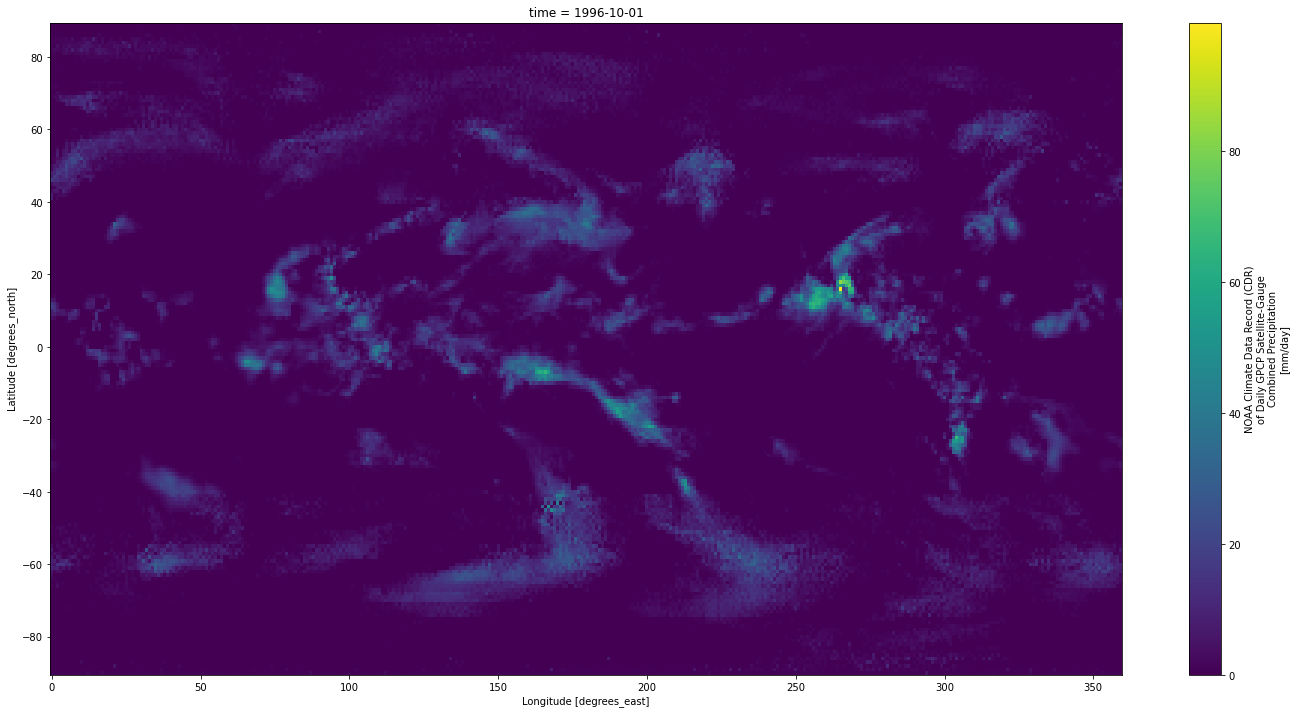

In [2]:
# display the precipitation field over the entire globe, using the first daily time step [0] in the dataset (calendar date = 1996-10-01)
# set display size to be 24 x 12
ds.precip[0].plot(figsize=(24,12))

In [3]:
# Add the Dask Progress Bar so we can watch how long it takes to work on the data
from dask.diagnostics import ProgressBar

In [4]:
# There are corrupted values in the dataset, so we want to create a Mask to prevent those from being visualized
# set precipitation minimum to zero mm/day and less than 1000 mm/day
mask = (ds.precip >= 0 ) & (ds.precip < 1000)

In [5]:
# using the Progress Bar
# calculate the climatology of global precipitation over the entire record, mean precipitation over time.
with ProgressBar():
    precip_clim = ds.precip.where(mask).mean('time').compute()

[########################################] | 100% Completed | 23.29 s


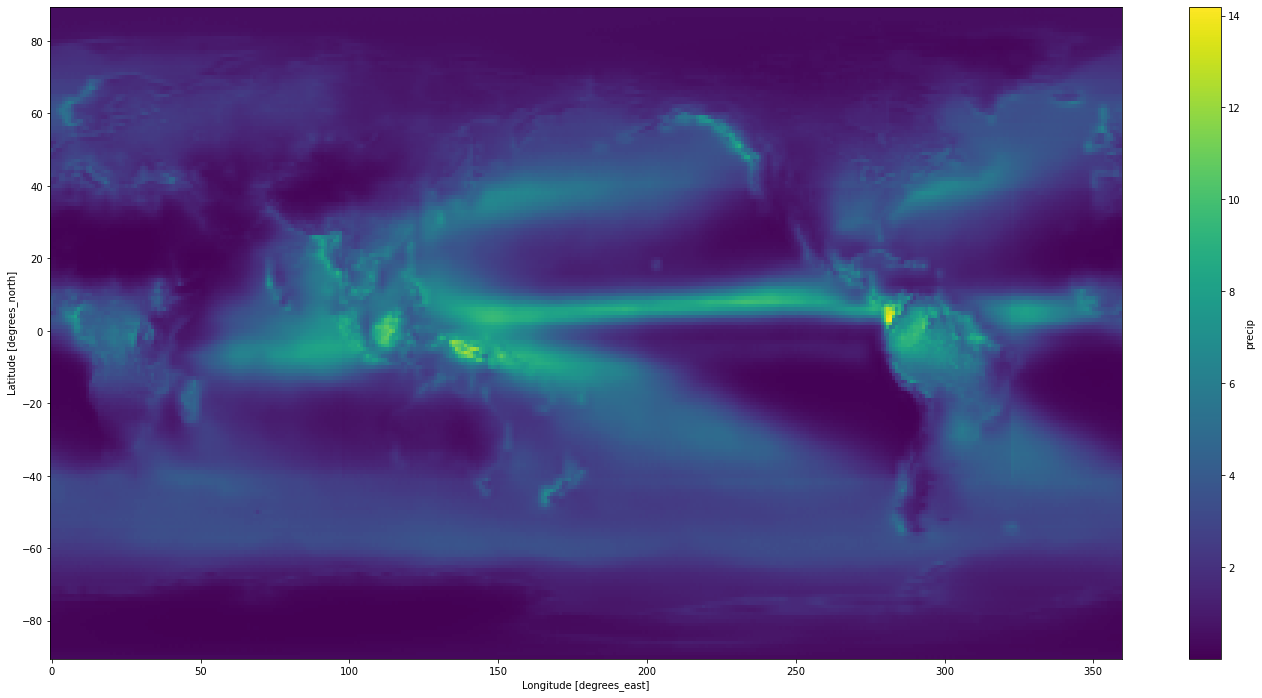

In [6]:
# plot the mean climatology of precipitation over the entire globe
precip_clim.plot(figsize=(24,12))

## About the figure

This figure is the global precipitation of the entire earth over the last 26 years.

You can see the intertropical convergence zone (lighter yellows and greens), and areas in the tropics which experience high rainfall

## Credits

Thanks to Ryan Abernathey for giving his talk at SciPy2022 and his live coding session.

Thanks to the [PANGEO Funders and Contributors](https://pangeo.io/collaborators.html#collaborators)